In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.0,1,1.0,1.0,0.0,0,0.0,2.0,NaN,...,0.0,NaN,0.0,0.0,0,0.0,0,NaN,2,0.0
1,1,1.0,2,0.0,0.0,0.0,3,0.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0,2.0,2,2.0,0,7.0
2,2,2.0,1,0.0,0.0,0.0,3,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0,3.0,3,2.0,0,7.0
3,2,2.0,2,1.0,0.0,0.0,2,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0,2.0,2,2.0,0,7.0
4,2,2.0,1,0.0,NaN,0.0,2,0.0,NaN,0.0,...,0.0,0.0,0.0,3.0,0,2.0,2,2.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,NaN,0,2.0,1.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0,0.0,0,3.0,0,NaN
354,2,3.0,2,0.0,0.0,0.0,0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1.0,0,70.0
355,2,2.0,2,1.0,0.0,0.0,0,0.0,0.0,NaN,...,0.0,0.0,0.0,2.0,0,0.0,0,2.0,0,70.0
356,2,NaN,0,3.0,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0,0.0,0,1.0,0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	18
int64		column 3	0
float64		column 4	18
float64		column 5	55
float64		column 6	18
int64		column 7	0
float64		column 8	18
float64		column 9	19
float64		column 10	37
float64		column 11	18
float64		column 12	18
int64		column 13	0
float64		column 14	36
int64		column 15	0
int64		column 16	0
float64		column 17	37
float64		column 18	18
float64		column 19	55
int64		column 20	0
float64		column 21	18
float64		column 22	37
int64		column 23	0
int64		column 24	0
float64		column 25	36
float64		column 26	19
float64		column 27	36
float64		column 28	18
int64		column 29	0
float64		column 30	18
int64		column 31	0
float64		column 32	19
int64		column 33	0
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,340.000000,358.000000,340.000000,303.000000,340.000000,358.000000,340.000000,339.000000,321.000000,...,322.000000,339.000000,322.000000,340.000000,358.000000,340.000000,358.000000,339.000000,358.000000,340.000000
mean,2.078212,1.823529,1.569832,1.367647,0.603960,0.444118,0.170391,0.367647,0.616519,0.479751,...,0.385093,0.451327,0.434783,0.926471,0.458101,0.091176,0.117318,1.884956,0.558659,36.202941
std,0.664865,0.694291,0.900909,1.122371,0.869793,0.949986,0.576394,0.821977,0.991305,0.862624,...,0.843240,0.856487,0.942474,1.122526,0.959796,0.407067,0.493863,0.671731,1.107990,14.990754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

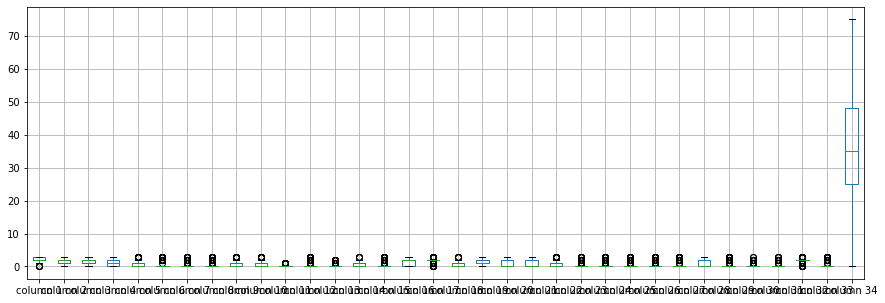

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.823529
column 3      1.569832
column 4      1.367647
column 5      0.603960
column 6      0.444118
column 7      0.170391
column 8      0.367647
column 9      0.616519
column 10     0.479751
column 11     0.123529
column 12     0.405882
column 13     0.142458
column 14     0.506211
column 15     0.315642
column 16     1.368715
column 17     1.984424
column 18     0.508824
column 19     1.234323
column 20     0.662011
column 21     0.976471
column 22     0.598131
column 23     0.298883
column 24     0.368715
column 25     0.385093
column 26     0.451327
column 27     0.434783
column 28     0.926471
column 29     0.458101
column 30     0.091176
column 31     0.117318
column 32     1.884956
column 33     0.558659
column 34    36.202941
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.420778,0.248062,-0.014155,-0.004021,0.026207,-0.115275,-0.044022,0.137851,0.226335,...,-0.021504,0.183559,-0.006225,0.064161,-0.012408,-0.034697,0.006100,0.069821,-0.013850,0.022450
column 2,0.420778,1.000000,0.343635,-0.062129,0.010408,-0.081856,-0.102392,-0.080993,0.271676,0.281850,...,-0.076972,0.182323,-0.107589,0.050643,-0.099165,-0.040156,-0.025210,0.036328,-0.122049,0.043367
column 3,0.248062,0.343635,1.000000,-0.064065,0.271018,0.299265,-0.176715,0.265525,0.301325,0.226259,...,0.308783,0.337909,0.259277,-0.254625,0.267409,-0.115340,-0.131788,0.102329,0.275099,0.164680
column 4,-0.014155,-0.062129,-0.064065,1.000000,0.259460,0.395380,-0.132731,0.343957,-0.308581,-0.152812,...,0.366647,-0.196301,0.335679,0.006137,0.368480,-0.153019,-0.173237,0.042157,0.376598,-0.005627
column 5,-0.004021,0.010408,0.271018,0.259460,1.000000,0.340162,-0.163466,0.319143,-0.030218,-0.006536,...,0.372497,-0.019909,0.292543,0.010214,0.340690,-0.133840,-0.159899,0.064764,0.339425,0.106483
column 6,0.026207,-0.081856,0.299265,0.395380,0.340162,1.000000,-0.140597,0.881538,-0.293037,-0.258422,...,0.878974,-0.110081,0.906547,0.100251,0.888564,-0.096363,-0.114457,0.244067,0.900671,0.101788
column 7,-0.115275,-0.102392,-0.176715,-0.132731,-0.163466,-0.140597,1.000000,-0.133790,0.207196,0.007064,...,-0.109658,-0.155647,-0.139879,-0.007860,-0.141489,0.815849,0.844721,-0.104217,-0.136311,-0.365280
column 8,-0.044022,-0.080993,0.265525,0.343957,0.319143,0.881538,-0.133790,1.000000,-0.280447,-0.263751,...,0.873514,-0.098678,0.885979,0.105066,0.876707,-0.075812,-0.106912,0.254838,0.892605,0.106394
column 9,0.137851,0.271676,0.301325,-0.308581,-0.030218,-0.293037,0.207196,-0.280447,1.000000,0.669505,...,-0.253432,0.469142,-0.263971,-0.414517,-0.279138,0.257743,0.243157,-0.058771,-0.274278,-0.038882
column 10,0.226335,0.281850,0.226259,-0.152812,-0.006536,-0.258422,0.007064,-0.263751,0.669505,1.000000,...,-0.248886,0.465895,-0.238073,-0.401878,-0.259659,-0.016643,-0.001352,0.021584,-0.257650,0.087088


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+17,34+17+17,34+17+17+17,34+17+17+17+17,34+17+17+17+17+17,34+17+17+17+17+17+17,34+17+17+17+17+17+17+17,34+17+17+17+17+17+17,34+17+17+17+17+17,34+17+17+17+17,34+17+17+17,34+17+17,34+17,34], vae_layer = False, seed = 17)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 72.30474801497026
Epoch: 1 , loss: 71.82446133006702
Epoch: 2 , loss: 72.08951516584916
Epoch: 3 , loss: 71.7752668207342
Epoch: 4 , loss: 72.15808695012873
Epoch: 5 , loss: 71.41320558027788
Epoch: 6 , loss: 71.25187891179866
Epoch: 7 , loss: 70.71661654385653
Epoch: 8 , loss: 68.7537406574596
Epoch: 9 , loss: 66.44807780872692
Epoch: 10 , loss: 65.08714918656783
Epoch: 11 , loss: 64.81274049932307
Epoch: 12 , loss: 63.78682535344904
Epoch: 13 , loss: 63.405888470736414
Epoch: 14 , loss: 62.81793438304555
Epoch: 15 , loss: 62.85369092767889
Epoch: 16 , loss: 62.363174265081234
Epoch: 17 , loss: 62.317297675392844
Epoch: 18 , loss: 61.867816578258164
Epoch: 19 , loss: 62.104457508433946
Epoch: 20 , loss: 61.77311203696511
Epoch: 21 , loss: 61.46665365045721
Epoch: 22 , loss: 61.46547733653676
Epoch: 23 , loss: 61.80874356356534
Epoch: 24 , loss: 61.238150509920985
Epoch: 25 , loss: 60.856322201815516
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.327269
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30    -0.002981
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.000000,0,0.0,0.000000,0.0,0,0.0,0.000000,-1.747851,...,0.0,0.227378,0.0,0.000000,0,0.0,0,1.140652,0,0.000000
1,0,0.000000,0,0.0,0.000000,0.0,0,0.0,0.000000,0.277929,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,0.000000
2,0,0.000000,0,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,0.000000
3,0,0.000000,0,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,0.000000
4,0,0.000000,0,0.0,0.490788,0.0,0,0.0,-1.502573,0.000000,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,-0.036981,0,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,-61.472321
354,0,0.000000,0,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,0.000000
355,0,0.000000,0,0.0,0.000000,0.0,0,0.0,0.000000,0.369203,...,0.0,0.000000,0.0,0.000000,0,0.0,0,0.000000,0,0.000000
356,0,-0.377662,0,0.0,0.208341,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.310178,0,0.0,0,0.000000,0,-68.242017


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(165.6091951668649, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.21846087670528072

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.446735
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.000000,1,1.0,1.000000,0.0,0,0.0,2.000000,0.252149,...,0.0,0.227378,0.0,0.000000,0,0.0,0,1.140652,2,0.000000
1,1,1.000000,2,0.0,0.000000,0.0,3,0.0,3.000000,0.277929,...,0.0,0.000000,0.0,0.000000,0,2.0,2,2.000000,0,7.000000
2,2,2.000000,1,0.0,0.000000,0.0,3,0.0,2.000000,0.000000,...,0.0,0.000000,0.0,2.000000,0,3.0,3,2.000000,0,7.000000
3,2,2.000000,2,1.0,0.000000,0.0,2,0.0,2.000000,2.000000,...,0.0,0.000000,0.0,2.000000,0,2.0,2,2.000000,0,7.000000
4,2,2.000000,1,0.0,0.490788,0.0,2,0.0,0.497427,0.000000,...,0.0,0.000000,0.0,3.000000,0,2.0,2,2.000000,0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,1.963019,0,2.0,1.000000,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,3.000000,0,0.0,0,3.000000,0,8.527679
354,2,3.000000,2,0.0,0.000000,0.0,0,0.0,3.000000,2.000000,...,0.0,0.000000,0.0,0.000000,0,0.0,0,1.000000,0,70.000000
355,2,2.000000,2,1.0,0.000000,0.0,0,0.0,0.000000,0.369203,...,0.0,0.000000,0.0,2.000000,0,0.0,0,2.000000,0,70.000000
356,2,0.622338,0,3.0,0.208341,0.0,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.310178,0,0.0,0,1.000000,0,1.757983


In [20]:
imputations[-1].to_excel("DERM_NE_5(imp).xlsx", index=False, header=False)